## Ghouls, Goblins and Ghosts... boo!

![](https://github.com/RadhikaM200/Machine-Learning-and-EDA/blob/main/Ghouls,%20Goblins%20and%20Ghosts/Ghosts,%20Goblins%20and%20Ghouls.png?raw=true)

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Data Loading and Description](#section3)   
  - 3.1 [Description of the dataset](#section301)<br><br>
   
4. [Data Exploration](#section4)<br>
   - 4.1 [Data Preprocessing](#section401)<br><br>
   
5. [Exploratory Data Analysis](#section5)<br>
6. [Preparing Data for Modelling](#section6)<br>
7. [Modelling using scikit learn](#section7)<br>
   - 7.1 [LDA for Classification](#section701)<br>
   - 7.2 [LDA for Dimensiionality Reduction](#section702)<br>
   - 7.3 [Voting Classifier](#section703)<br>
   - 7.4 [Bagging Classifier](#section704)<br>
   - 7.5 [AdaBoost Classifier](#section705)<br>

8. [Conclusion](#section8)<br>

<a id=section1></a>
## 1. Problem Statement

This dataset contains details regarding various attributes found in three creatures - **Ghouls, Goblins and Ghosts**. We need to train models that can best classify the test dataset into the respective types.

<a id=section2></a>
## 2. Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import time

# To supress all the warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

<a id=section3></a>
## 3. Data Loading and Description

<a id=section301></a>
### 3.1 Description of the Dataset

| Column Name                     | Description                                                                               |
| ------------------------------- |:-----------------------------------------------------------------------------------------:| 
| ID                             | ID variable.                                                                      | 
| bone_length                 | average length of bone in the creature, normalized between 0 and 1.                                |
| rotting_flesh       | percentage of rotting flesh in the creature.                                        | 
| hair_length                    | average hair length, normalized between 0 and 1.                                                          |
| has_soul                      | percentage of soul in the creature.                                               |
| color                      | dominant color of the creature: 'white','black','clear','blue','green','blood'.                                      |
|type             | target variable: 'Ghost', 'Goblin', and 'Ghoul'                 |



- **Loading the dataset**

In [2]:
ghouls_train = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_train.csv')
ghouls = ghouls_train.copy(deep=True)
ghouls_train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [3]:
ghouls_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


- There are **371 rows** and **7 Columns**
- There seem to be no null-values.
- There are 7 variables, out of which:
   - 5 are numerical
   - 2 are categorical
- **type** and **color** have to be encoded before modelling.
- **type** is the target variable.

In [4]:
ghouls_train.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


 - **```describe```** function gives information regarding the distribution and nature of data.
     - All columns are **normally distributed** as their **mean and median values are almost equal.**

<a id=section4></a>
## 4. Data Exploration

<a id=section401></a>
### 4.1 Data Preprocessing

- **Checking for null values**

In [5]:
ghouls_train.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

- There are no null values

- **We'll drop the ID variable as it doesn't provide any information and is simply a unique number.**

In [6]:
ghouls_train.drop(['id'], axis=1,inplace=True)

- **Encoding Categorical Variables - type and color**

In [7]:
ghouls_train = pd.get_dummies(ghouls_train, columns = ['color'], drop_first=True)
ghouls_train.head()

,bone_length,rotting_flesh,hair_length,has_soul,type,color_blood,color_blue,color_clear,color_green,color_white
0,0.354512,0.350839,0.465761,0.781142,Ghoul,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,Goblin,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,Ghoul,0,0,0,0,0
3,0.776652,0.508723,0.636766,0.884464,Ghoul,0,0,0,0,0
4,0.566117,0.875862,0.418594,0.636438,Ghost,0,0,0,1,0


In [8]:
ghouls_train['type'].unique()

array(['Ghoul', 'Goblin', 'Ghost'], dtype=object)

- **There are 3 unique values for the target variable type**
<br><br>
- Replacing values as:
  - **Ghoul - 0**
  - **Goblin - 1**
  - **Ghost - 2**

In [9]:
ghouls_train['type'] = ghouls_train['type'].astype(str).str.replace('Ghoul', '0')
ghouls_train['type'] = ghouls_train['type'].astype(str).str.replace('Goblin', '1')
ghouls_train['type'] = ghouls_train['type'].astype(str).str.replace('Ghost', '2')
ghouls_train['type'] = ghouls_train['type'].astype(int)

- **Final set of columns in the dataset:**

In [10]:
ghouls_train.columns

Index(['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'type',
       'color_blood', 'color_blue', 'color_clear', 'color_green',
       'color_white'],
      dtype='object')

- **After preprocessing, the dataset now looks like:**

In [11]:
ghouls_train.head()

,bone_length,rotting_flesh,hair_length,has_soul,type,color_blood,color_blue,color_clear,color_green,color_white
0,0.354512,0.350839,0.465761,0.781142,0,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,1,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,0,0,0,0,0,0
3,0.776652,0.508723,0.636766,0.884464,0,0,0,0,0,0
4,0.566117,0.875862,0.418594,0.636438,2,0,0,0,1,0


<a id=section5></a>
## 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.

- **Analysing the target Variable**

In [12]:
ghouls.type.unique()

array(['Ghoul', 'Goblin', 'Ghost'], dtype=object)

Text(0.5, 1.0, 'Pie chart showing the proportion of each Type value')

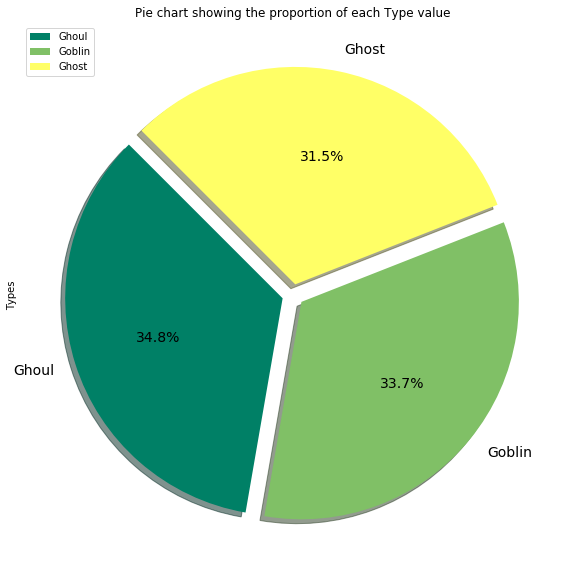

In [13]:
ghouls.type.value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('Types')
plt.title('Pie chart showing the proportion of each Type value')

- We can see that we almost have equal proportions of each species in the training dataset.

- Drawing pairplots to know the relationship between **bone_length, rotting_flesh, hair_length and has_soul**

In [14]:
ghouls.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


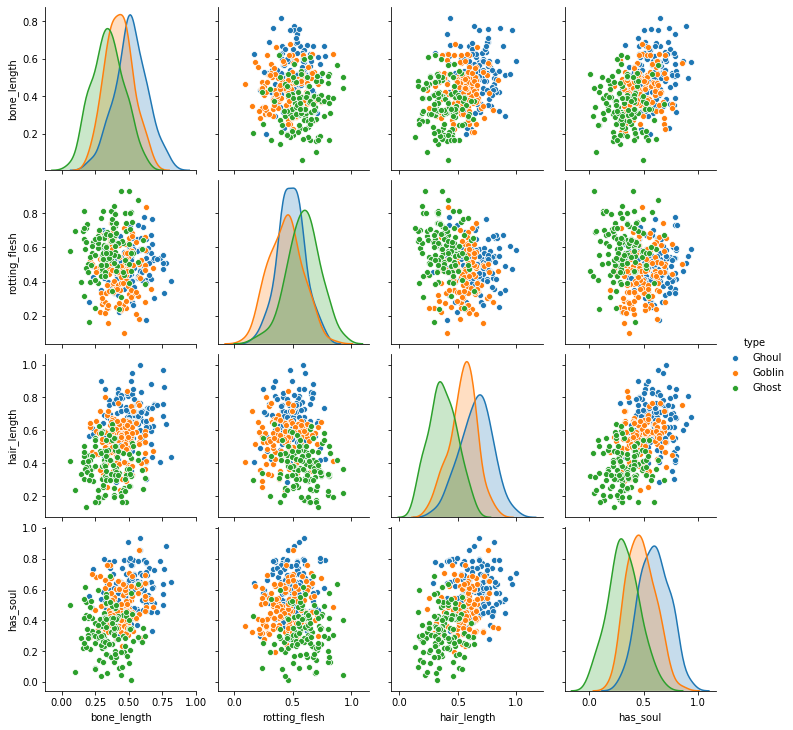

In [15]:
sns.pairplot(ghouls[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'type']], vars=['bone_length', 'rotting_flesh', 'hair_length', 'has_soul'], hue='type', dropna=True )

In [16]:
print("Bone Length")
print("The Values for Ghost ranges between: {} and {}".format(round(ghouls[ghouls.type=='Ghost']['bone_length'].min(), 3), round(ghouls[ghouls.type=='Ghost']['bone_length'].max(), 3)))
print("The Values for Goblin ranges between: {} and {}".format(round(ghouls[ghouls.type=='Goblin']['bone_length'].min(), 3), round(ghouls[ghouls.type=='Goblin']['bone_length'].max(), 3)))
print("The Values for Ghoul ranges between: {} and {}".format(round(ghouls[ghouls.type=='Ghoul']['bone_length'].min(), 3), round(ghouls[ghouls.type=='Ghoul']['bone_length'].max(), 3)))
print("-------------------------------------------------------------------")

print("Rotting Flesh")
print("The Values for Ghost ranges between: {} and {}".format(round(ghouls[ghouls.type=='Ghost']['rotting_flesh'].min(), 3), round(ghouls[ghouls.type=='Ghost']['rotting_flesh'].max(), 3)))
print("The Values for Goblin ranges between: {} and {}".format(round(ghouls[ghouls.type=='Goblin']['rotting_flesh'].min(), 3), round(ghouls[ghouls.type=='Goblin']['rotting_flesh'].max(), 3)))
print("The Values for Ghoul ranges between: {} and {}".format(round(ghouls[ghouls.type=='Ghoul']['rotting_flesh'].min(), 3), round(ghouls[ghouls.type=='Ghoul']['rotting_flesh'].max(), 3)))
print("-------------------------------------------------------------------")

print("Hair Length")
print("The Values for Ghost ranges between: {} and {}".format(round(ghouls[ghouls.type=='Ghost']['hair_length'].min(), 3), round(ghouls[ghouls.type=='Ghost']['hair_length'].max(), 3)))
print("The Values for Goblin ranges between: {} and {}".format(round(ghouls[ghouls.type=='Goblin']['hair_length'].min(), 3), round(ghouls[ghouls.type=='Goblin']['hair_length'].max(), 3)))
print("The Values for Ghoul ranges between: {} and {}".format(round(ghouls[ghouls.type=='Ghoul']['hair_length'].min(), 3), round(ghouls[ghouls.type=='Ghoul']['hair_length'].max(), 3)))
print("-------------------------------------------------------------------")

print("Has Soul")
print("The Values for Ghost ranges between: {} and {}".format(round(ghouls[ghouls.type=='Ghost']['has_soul'].min(), 3), round(ghouls[ghouls.type=='Ghost']['has_soul'].max(), 3)))
print("The Values for Goblin ranges between: {} and {}".format(round(ghouls[ghouls.type=='Goblin']['has_soul'].min(), 3), round(ghouls[ghouls.type=='Goblin']['has_soul'].max(), 3)))
print("The Values for Ghoul ranges between: {} and {}".format(round(ghouls[ghouls.type=='Ghoul']['has_soul'].min(), 3), round(ghouls[ghouls.type=='Ghoul']['has_soul'].max(), 3)))
print("-------------------------------------------------------------------")

Bone Length
The Values for Ghost ranges between: 0.061 and 0.622
The Values for Goblin ranges between: 0.209 and 0.679
The Values for Ghoul ranges between: 0.201 and 0.817
-------------------------------------------------------------------
Rotting Flesh
The Values for Ghost ranges between: 0.166 and 0.932
The Values for Goblin ranges between: 0.096 and 0.84
The Values for Ghoul ranges between: 0.172 and 0.779
-------------------------------------------------------------------
Hair Length
The Values for Ghost ranges between: 0.135 and 0.636
The Values for Goblin ranges between: 0.239 and 0.84
The Values for Ghoul ranges between: 0.287 and 1.0
-------------------------------------------------------------------
Has Soul
The Values for Ghost ranges between: 0.009 and 0.69
The Values for Goblin ranges between: 0.194 and 0.855
The Values for Ghoul ranges between: 0.281 and 0.936
-------------------------------------------------------------------


**Observations:**

- On analysing **bone_length**:
    - w.r.t **type** :
        - The spread for type -**Ghost**, lies in the lower range of values as compared to the other 2
        - The spread for type- **Ghoul**, lies slightly in the higher range, especially the higher values)
        - The values for all these 3 types do intersect quite a lot and hence, **bone_length** alone cannot be a deciding factor in determing the **type**, however, it can be a contributing factor.
    - w.r.t **rotting_flesh** :
        - The distribution has a **slight linear** nature when we see categorically.
        - While values for all types are mixed and equally spread over **rotting_flesh** but a subtle pattern can be noticed- majority of **Ghost** have lower bone_length values, while **Ghouls** are on the higher end.
    - w.r.t **hair_length**:
         - The distribution has a **linear** nature.
         - The majority of data points for type **Ghost** lie in the lower values for **hair_length** and **bone_length**
         - The majority of data points for type **Goblin** lie somewhere in the middle for **hair_length** and **bone_length**
         - The majority of data points for type **Ghoul** lie in the higher range for **hair_length** and **bone_length**
    - w.r.t **has_soul**:
         - The distribution has a **linear** nature.
         - While the spread is pretty mixed for all categories, it can still contribute to determining the types alongwith other factors 

- On analysing **rotting_flesh**:
    - w.r.t **type** :
        - The spread for type -**Goblin**, lies in the lower range of values as compared to the other 2
        - The spread for type- **Ghoul**, has a smaller range as compared to the other two categories and most of the values overlap with the other 2 types
        - The spread for type -**Ghost**, lies in the higher range of values as compared to the other 2
    - w.r.t **hair_length** :
        - The distribution has a **slight linear** nature when we see categorically.
        - The spread for **Ghost** is centralised over higher **rotting_flesh** values and in the first half of **hair_length** values
    - w.r.t  **has_soul** :
        - The distribution has a **slight linear** nature when we see categorically.
        
- On analysing **hair_length**:   
    - w.r.t **type** :
        - Few datapoints lie in the region where the 3 categories intersect and the range for each category seems clearly demarcated.
        - The spread for type -**Ghost**, lies in the lower range of values as compared to the other 2
        - The spread for type- **Ghoul**, lies slightly in the higher range, especially the higher values)
    - w.r.t **has_soul**:
        - The distribution has a **linear** nature.
        - The spread for each concentrates in the following order of increasing **hair_length** and **has_soul** values :
        **Ghost < Goblin < Ghoul**
        
- On analysing **has_soul**:
    - w.r.t **type** :
        - The spread for type -**Ghost**, lies in the lower range of values as compared to the other 2
        - The spread for type -**Ghoul**, lies in the higher range of values as compared to the other 2

- **Establishing correlation between all the features using heatmap.**

Text(0.5, 1, 'Correlation between features')

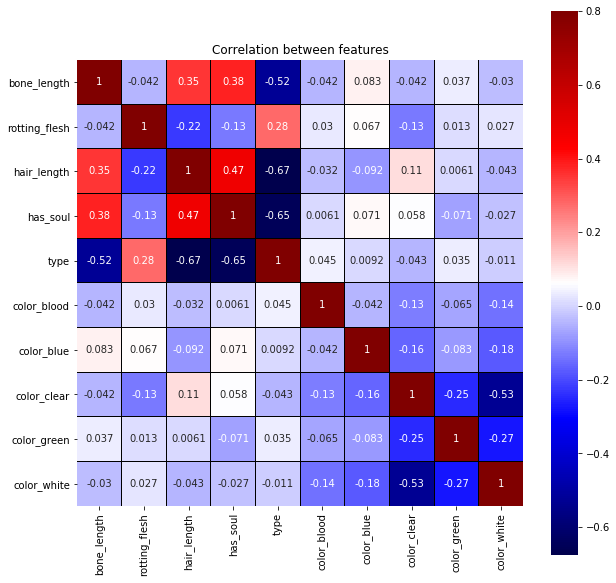

In [17]:
corr = ghouls_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='seismic',linecolor ='black')
plt.title('Correlation between features')

In [18]:
corr[abs(corr) >= 0.8].count()

bone_length      1
rotting_flesh    1
hair_length      1
has_soul         1
type             1
color_blood      1
color_blue       1
color_clear      1
color_green      1
color_white      1
dtype: int64

- **Here, none of the correlation values are greater than 0.8, hence, we'll not have redundacy issues.**

<a id=section6></a>
## 6. Preparing Data for Modelling

In [19]:
X = ghouls_train.drop('type', axis=1)
y = ghouls_train.type

In [20]:
X.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_blood,color_blue,color_clear,color_green,color_white
0,0.354512,0.350839,0.465761,0.781142,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,0,0,0,0,0
3,0.776652,0.508723,0.636766,0.884464,0,0,0,0,0
4,0.566117,0.875862,0.418594,0.636438,0,0,0,1,0


In [21]:
y.head()

0    0
1    1
2    0
3    0
4    2
Name: type, dtype: int32

In [22]:
print(X.shape, y.shape)

(371, 9) (371,)


- **Scaling data**

In [23]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X)

In [24]:
X_train_scaled.shape

(371, 9)

## Preparing Test Dataset

In [25]:
ghouls_test = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_test.csv')
ghouls_test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [26]:
ghouls_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             529 non-null    int64  
 1   bone_length    529 non-null    float64
 2   rotting_flesh  529 non-null    float64
 3   hair_length    529 non-null    float64
 4   has_soul       529 non-null    float64
 5   color          529 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 24.9+ KB


In [27]:
ghouls_test.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
dtype: int64

- **There are no null values**

In [28]:
test_ids = ghouls_test['id']
ghouls_test.drop(['id'], axis=1,inplace=True)
test_ids.shape

(529,)

In [29]:
ghouls_test = pd.get_dummies(ghouls_test, columns = ['color'], drop_first=True)
ghouls_test.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_blood,color_blue,color_clear,color_green,color_white
0,0.471774,0.387937,0.706087,0.698537,0,0,0,0,0
1,0.427332,0.645024,0.565558,0.451462,0,0,0,0,1
2,0.549602,0.491931,0.660387,0.449809,0,0,0,0,0
3,0.638095,0.682867,0.471409,0.356924,0,0,0,0,1
4,0.361762,0.583997,0.377256,0.276364,0,0,0,0,0


- **Scaling the testing dataset, using the same scaler object used to scale the train dataset**

In [30]:
X_test_scaled = scaler.transform(ghouls_test)

<a id=section7></a>
## 7. Modelling using Scikit Learn

<a id=section701></a>
## 7.1 Linear Discriminant Analysis for Classification

In [31]:
model_LDA = LDA()
start_time = time.time()
model_LDA.fit(X_train_scaled, y)
time2 = time.time() - start_time
y_pred = model_LDA.predict(X_train_scaled)
print("Time taken for training : {}".format(time2))

Time taken for training : 0.004994630813598633


In [32]:
#Calculate the accuracy score
print("The training scores for LDA are: ")
print(confusion_matrix(y_pred,y))
print(classification_report(y_pred,y))

The training scores for LDA are: 
[[100  30   0]
 [ 28  82  16]
 [  1  13 101]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       130
           1       0.66      0.65      0.65       126
           2       0.86      0.88      0.87       115

    accuracy                           0.76       371
   macro avg       0.76      0.77      0.77       371
weighted avg       0.76      0.76      0.76       371



- **Prediction on test dataset**

In [33]:
y_pred_test =  model_LDA.predict(X_test_scaled)
test_prediction_df1 = pd.DataFrame({"id" : test_ids,
                                  "type" : y_pred_test})

In [34]:
test_prediction_df1['type'] = test_prediction_df1['type'].astype(str).str.replace('0','Ghoul')
test_prediction_df1['type'] = test_prediction_df1['type'].astype(str).str.replace('1','Goblin')
test_prediction_df1['type'] = test_prediction_df1['type'].astype(str).str.replace('2','Ghost')

test_prediction_df1.head()

,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Goblin
4,13,Ghost


In [35]:
test_prediction_df1['type'].value_counts()

Ghoul     187
Ghost     179
Goblin    163
Name: type, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the proportion of each Type value')

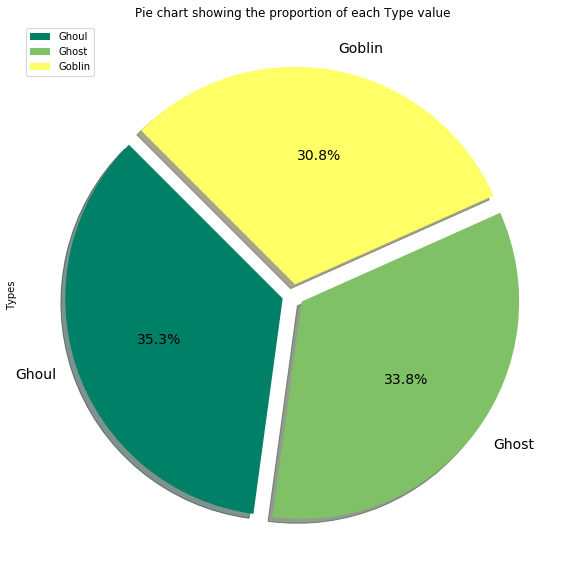

In [36]:
test_prediction_df1.type.value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('Types')
plt.title('Pie chart showing the proportion of each Type value')

<a id=section702></a>
## 7.2 LDA for Dimensionality Reduction

In [37]:
# Create array of explained variance ratios
lda_var_ratios = model_LDA.explained_variance_ratio_

In [38]:
# create a function to select the optimum n_components values based on the required explained variance value

def optimum_n_components(variance, req_var):
    totVar = 0.0
    n_comp = 0
    
    for explainedVar in variance:
        totVar += explainedVar
        n_comp += 1
        
        if(totVar >= req_var):
            break
    return n_comp

In [60]:
# We want the value for n_components where explained variance is 95%
n = optimum_n_components(lda_var_ratios, 0.98)
print(n)

2


In [61]:
lda = LDA(n_components=n)
X_train_lda = lda.fit_transform(X_train_scaled, y)

#transforming the test dataset
X_test_lda = lda.transform(X_test_scaled)

In [62]:
print(X_train_lda.shape, y.shape, X_test_scaled.shape)

(371, 2) (371,) (529, 9)


- **Now, our LDA applied datasets are ready. We can implement other classifiers on them**

<a id=section703></a>
## 7.3 Voting Classifier

In [63]:
model_LDA_logR = LogisticRegression()
model_LDA_DT = DecisionTreeClassifier()
model_LDA_RF = RandomForestClassifier()
model_LDA_SVC = SVC()

# here we are using hard voting
voting_clf = VotingClassifier(
    estimators=[('lr', model_LDA_logR), ('dt', model_LDA_DT), ('rf', model_LDA_RF), ('svc', model_LDA_SVC)],
    voting='hard')
start_time = time.time()
voting_clf.fit(X_train_lda, y) 
time1 = time.time() - start_time
print("Time taken for training : {}".format(time1))

Time taken for training : 0.49811840057373047


In [64]:
#predict
y_pred=voting_clf.predict(X_train_lda)

In [65]:
#Calculate the accuracy score
print("The training scores for Voting Classifier are: ")
print(confusion_matrix(y_pred,y))
print(classification_report(y_pred,y))

The training scores for Voting Classifier are: 
[[129  26   0]
 [  0  99  14]
 [  0   0 103]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       155
           1       0.79      0.88      0.83       113
           2       0.88      1.00      0.94       103

    accuracy                           0.89       371
   macro avg       0.89      0.90      0.89       371
weighted avg       0.90      0.89      0.89       371



- **Checking individual  performances of these models**

In [66]:
for clf in (model_LDA_logR, model_LDA_DT, model_LDA_RF, model_LDA_SVC, voting_clf):
  clf.fit(X_train_lda, y)
  y_pred = clf.predict(X_train_lda)
  
  print(clf.__class__.__name__, accuracy_score(y, y_pred))

LogisticRegression 0.7601078167115903
DecisionTreeClassifier 1.0
RandomForestClassifier 1.0
SVC 0.7789757412398922
VotingClassifier 0.8921832884097035


- **Prediction on test dataset**

In [67]:
y_pred_test =  voting_clf.predict(X_test_lda)
test_prediction_df2 = pd.DataFrame({"id" : test_ids,
                                  "type" : y_pred_test})

test_prediction_df2['type'] = test_prediction_df2['type'].astype(str).str.replace('0','Ghoul')
test_prediction_df2['type'] = test_prediction_df2['type'].astype(str).str.replace('1','Goblin')
test_prediction_df2['type'] = test_prediction_df2['type'].astype(str).str.replace('2','Ghost')

test_prediction_df2.head()

,id,type
0,3,Ghoul
1,6,Ghoul
2,9,Ghoul
3,10,Goblin
4,13,Ghost


In [68]:
test_prediction_df2['type'].value_counts()

Ghoul     200
Ghost     172
Goblin    157
Name: type, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the proportion of each Type value')

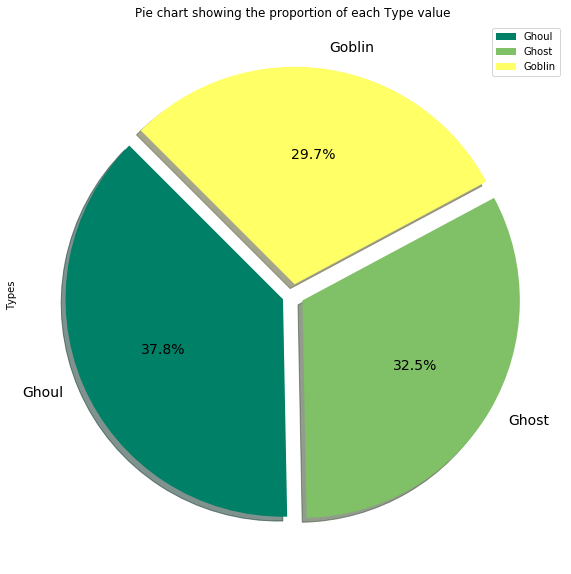

In [69]:
test_prediction_df2.type.value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('Types')
plt.title('Pie chart showing the proportion of each Type value')

<a id=section704></a>
## 7.4 Bagging Classifier

In [70]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

start_time = time.time()
bag_clf.fit(X_train_lda, y)
time1 = time.time() - start_time
print("Time taken for training : {}".format(time1))

Time taken for training : 4.138633966445923


In [71]:
y_pred = bag_clf.predict(X_train_lda)

In [72]:
#Calculate the accuracy score
print("The training scores for Bagging Classifier are: ")
print(confusion_matrix(y_pred,y))
print(classification_report(y_pred,y))

The training scores for Bagging Classifier are: 
[[110  22   0]
 [ 18  96   7]
 [  1   7 110]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       132
           1       0.77      0.79      0.78       121
           2       0.94      0.93      0.94       118

    accuracy                           0.85       371
   macro avg       0.85      0.85      0.85       371
weighted avg       0.85      0.85      0.85       371



- **Prediction on test dataset**

In [73]:
y_pred_test =  bag_clf.predict(X_test_lda)
test_prediction_df3 = pd.DataFrame({"id" : test_ids,
                                  "type" : y_pred_test})

test_prediction_df3['type'] = test_prediction_df3['type'].astype(str).str.replace('0','Ghoul')
test_prediction_df3['type'] = test_prediction_df3['type'].astype(str).str.replace('1','Goblin')
test_prediction_df3['type'] = test_prediction_df3['type'].astype(str).str.replace('2','Ghost')

test_prediction_df3.head()

,id,type
0,3,Ghoul
1,6,Ghoul
2,9,Ghoul
3,10,Goblin
4,13,Ghost


In [74]:
test_prediction_df3['type'].value_counts()

Goblin    179
Ghost     178
Ghoul     172
Name: type, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the proportion of each Type value')

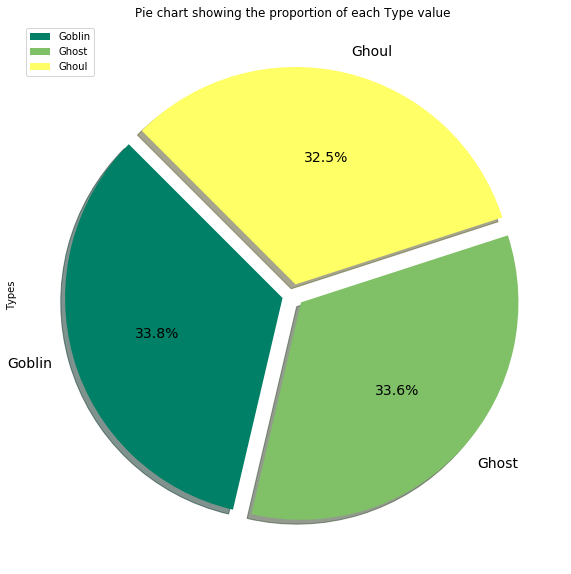

In [75]:
test_prediction_df3.type.value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('Types')
plt.title('Pie chart showing the proportion of each Type value')

<a id=section705></a>
## 7.5 AdaBoost Classifier

In [76]:
adaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
start_time = time.time()
adaBoost.fit(X_train_lda, y)
time1 = time.time() - start_time
print("Time taken for training : {}".format(time1))

scores_ada = cross_val_score(adaBoost, X_train_lda, y, cv=7)
print("The accuracy score for AdaBoost Classifier is : {}".format(scores_ada.mean()))

Time taken for training : 0.1968822479248047
The accuracy score for AdaBoost Classifier is : 0.5822102425876011


In [77]:
score = []
for depth in [1,2,10,15] : 
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth))
    scores_ada = cross_val_score(ada, X, y, cv=7)
    score.append(scores_ada.mean())


print(score)
print("The max score reached is :: {}%".format(round(max(score)*100,2)))

[0.6469002695417789, 0.6549865229110512, 0.7115902964959568, 0.6603773584905659]
The max score reached is :: 71.16%


- **Prediction on test dataset**

In [78]:
y_pred_test =  adaBoost.predict(X_test_lda)
test_prediction_df4 = pd.DataFrame({"id" : test_ids,
                                  "type" : y_pred_test})

test_prediction_df4['type'] = test_prediction_df4['type'].astype(str).str.replace('0','Ghoul')
test_prediction_df4['type'] = test_prediction_df4['type'].astype(str).str.replace('1','Goblin')
test_prediction_df4['type'] = test_prediction_df4['type'].astype(str).str.replace('2','Ghost')

test_prediction_df4.head()

,id,type
0,3,Goblin
1,6,Ghoul
2,9,Ghoul
3,10,Ghoul
4,13,Ghost


In [79]:
test_prediction_df4['type'].value_counts()

Goblin    181
Ghoul     179
Ghost     169
Name: type, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the proportion of each Type value')

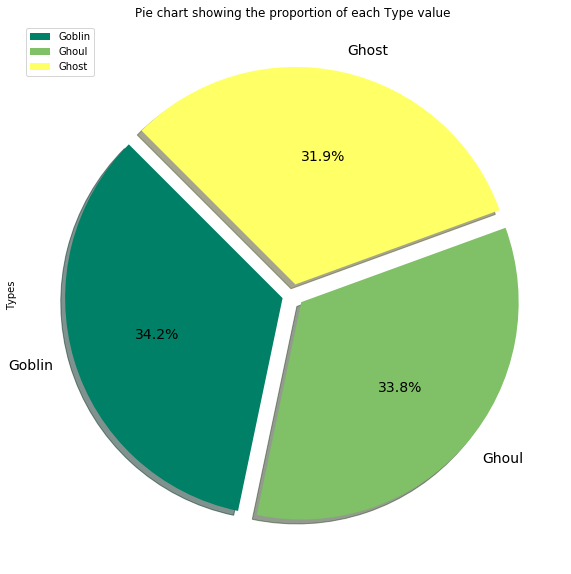

In [80]:
test_prediction_df4.type.value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('Types')
plt.title('Pie chart showing the proportion of each Type value')

<a id=section8></a>
## 8. Conclusion

- **Comparing results from all models**

------------------------
| **Algorithm used for the Model** | **Accuracy** |**Predicted Types Proportions on Test Dataset (Ghosts, Ghouls, Goblins)**  |
|--|--|--|
| Voting Classifier | 89%  | (32.5%, 37.8%, 29.7%) |
| Bagging Classifier | 85%  | (33.6%, 32.5%, 33.8%) |
| LDA for Classification | 76%  | (33.8%, 35.3%, 30.8%) |
| AdaBoost Classifier | 58%  | (31.9%, 33.8%, 34.2%)|
| | |

------------------------ 

- We can see that **Voting Classifier** has the highest **Training Accuracy** of **89%**. However, the top 3 classifiers have comparable results in terms of Proportions of each types - **Ghost, Ghouls and Goblin**